# Algoritmo de Deutsch

El algoritmo de Deutsch determina si una función es constante o balanceada

Tiene el potencial de ser más eficientes que los algoritmos clásicos al aprovechar el paralelismo inherente de los estados con superposición

El algoritmo toma una función de entrada y dos qubits auxiliares (q0, q1)

#### Paso 1: se le aplica una XGate al q1

$|\phi_0\rangle = I\otimes X |00\rangle = |01\rangle$

#### Paso 2: se le aplica una puerta Hadamard a ambos qubits

$|\phi_1\rangle = H^{\otimes2}|\phi_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$

### Paso 3: Se le aplica una compuerta $U_f$

Después aplicamos una compuerta que se inventó Dustch $U_f: U_f |xy\rangle = |x\rangle(|y\rangle\oplus f(x)\rangle)$ con esta compuerta podemos obtener una compuerta de tal forma que obtenemos:

# FALTA COPIAR LOS PASOS PARA ESTA FUNCIÓN

$|\phi_2\rangle = U_f|\phi_1\rangle= |x\rangle (-1)^{f(x)}(|0\rangle - |1\rangle)$

Con este resultado, podemos diferenciar dos casos: si $f(0) = f(1)$ (función constante) o si $f(0) \neq f(1)$ (función balanceada)

Si $f(0) = f(1): |\phi_2\rangle = \pm(\frac{1}{2})(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

Si $f(0) \neq f(1): |\phi_2\rangle = \pm(\frac{1}{2})(|00\rangle - |01\rangle - |10\rangle + |11\rangle)$

Donde el símbolo del $\pm$ está determinado por el resultado de $f(0)$. Si $f(0) = 0$ se toma signo $+$ y si $f(0) = 1$ se toma signo $-$

#### Paso 4: Se le aplica una compuerta Hadamard al primer bit

$|\phi_3\rangle = H\otimes I |\phi_2\rangle$


Si $f(0) = f(1): |\phi_3\rangle = \pm(\frac{1}{\sqrt2})|0\rangle(|0\rangle - |1\rangle)$

Si $f(0) \neq f(1): |\phi_3\rangle = \pm(\frac{1}{\sqrt2})|1\rangle(|0\rangle - |1\rangle)$

Con esto podemos ver que el primer bit coincide con la función, si obtenemos 0, la función es constante, y si es 1, la función es balanceada. Además, el signo de la función corresponde al valor de $f(0)$

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import json
from qiskit.quantum_info import Statevector

Aquí primero se implementarán las compuertas individuales de cada caso de los siguientes:

Caso 1: $f(0) = f(1) = 0$

Caso 2: $f(0) = 0, f(1) = 1$

Caso 3: $f(0) = 1, f(1) = 0$

Caso 4: $f(0) = f(1) = 1$

Circuito antes de la medición:


<IPython.core.display.Latex object>

Diagrama del circuito:


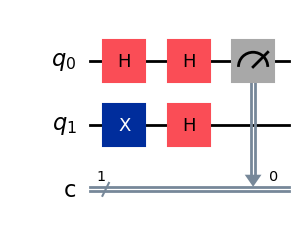

Histograma


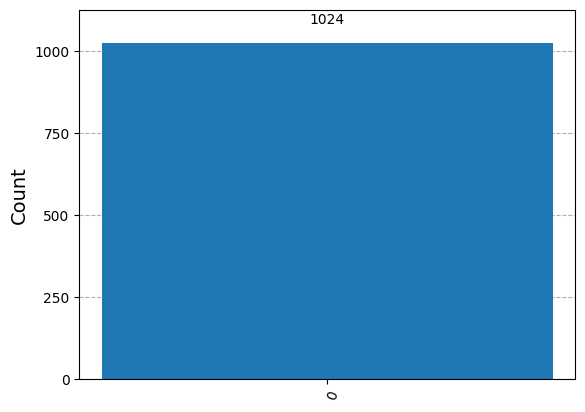

In [13]:
# Caso 1: f(0) = f(1) = 0
# Resultado esperado: 1/sqrt(2) (|0>(|0> - |1>))
# En el bit clásico debería de dar siempre 0 porque es una ec constante

circuit1 = QuantumCircuit(2, 1)
circuit1.h(0)
circuit1.x(1)
circuit1.h(1)

# No se le aplica nada

circuit1.h(0)

sv1 = Statevector.from_instruction(circuit1)
print("Circuito antes de la medición:")
display(sv1.draw('latex'))

circuit1.measure(0, 0)

print("Diagrama del circuito:")
display(circuit1.draw("mpl"))

backend = Aer.get_backend('statevector_simulator')
compiled1 = transpile(circuit1, backend)
job1 = backend.run(compiled1, shots=1024)
result1 = job1.result()
counts = result1.get_counts()
print("Histograma")
display(plot_histogram(counts))

Circuito antes de la medición:


<IPython.core.display.Latex object>

Diagrama del circuito:


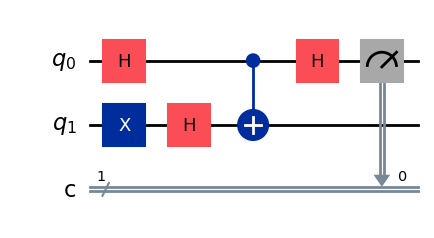

Histograma


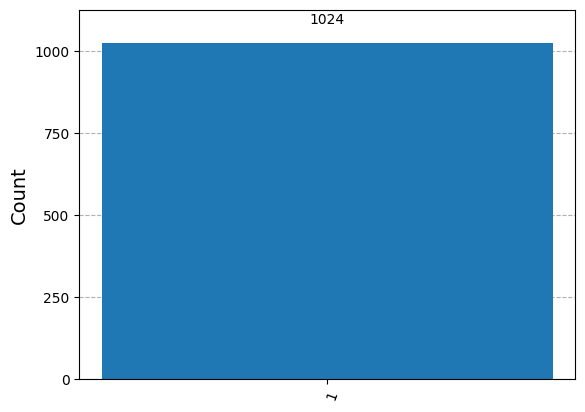

In [27]:
# Caso 2: f(0) = 0, f(1) = 1
# Resultado esperado: 1/sqrt(2) (|1>(|0> - |1>))
# En el bit clásico debería de dar siempre 1 porque es una ec balanceada

circuit2 = QuantumCircuit(2, 1)
circuit2.h(0)
circuit2.x(1)
circuit2.h(1)

# Se le aplica una compuerta CX
circuit2.cx(0,1)

circuit2.h(0)

sv2 = Statevector.from_instruction(circuit2)
print("Circuito antes de la medición:")
display(sv2.draw('latex'))

circuit2.measure(0, 0)

print("Diagrama del circuito:")
display(circuit2.draw("mpl"))

compiled2 = transpile(circuit2, backend)
job2 = backend.run(compiled2, shots=1024)
result2 = job2.result()
counts = result2.get_counts()
print("Histograma")
display(plot_histogram(counts))

Circuito antes de la medición:


<IPython.core.display.Latex object>

Diagrama del circuito:


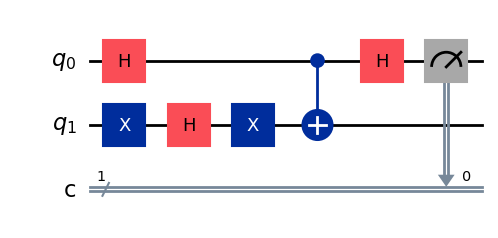

Histograma


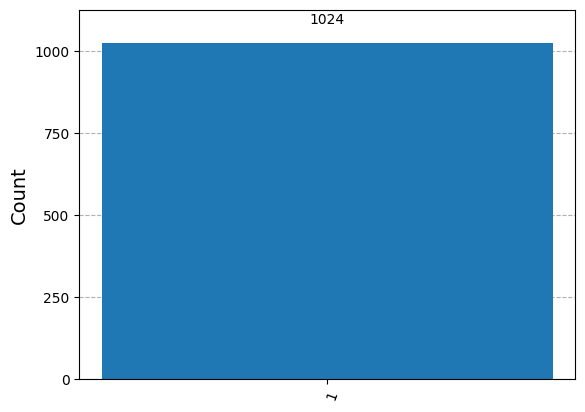

In [33]:
# Caso 3: f(0) = 1, f(1) = 0
# Resultado esperado: 1/sqrt(2) - (|1>(|0> - |1>))
# En el bit clásico debería de dar siempre 1 porque es una ec balanceada

circuit3 = QuantumCircuit(2, 1)
circuit3.h(0)
circuit3.x(1)
circuit3.h(1)

# Se le aplica una compuerta X al segundo bit, y luego una cx
circuit3.x(1)
circuit3.cx(0,1)

circuit3.h(0)

sv3 = Statevector.from_instruction(circuit3)
print("Circuito antes de la medición:")
display(sv3.draw('latex'))

circuit3.measure(0, 0)

print("Diagrama del circuito:")
display(circuit3.draw("mpl"))

compiled3 = transpile(circuit3, backend)
job3 = backend.run(compiled3, shots=1024)
result3 = job3.result()
counts = result3.get_counts()
print("Histograma")
display(plot_histogram(counts))

Circuito antes de la medición:


<IPython.core.display.Latex object>

Diagrama del circuito:


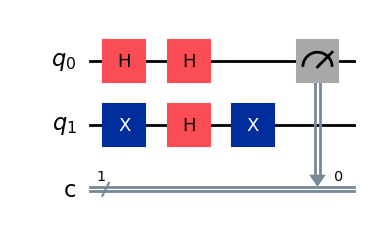

Histograma


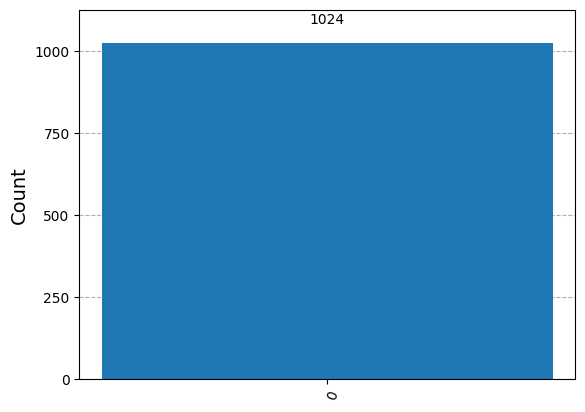

In [35]:
# Caso 4: f(0) = f(1) = 1
# Resultado esperado: 1/sqrt(2) - (|0>(|0> - |1>))
# En el bit clásico debería de dar siempre 0 porque es una ec constante

circuit4 = QuantumCircuit(2, 1)
circuit4.h(0)
circuit4.x(1)
circuit4.h(1)

# Se le aplica una compuerta X al segundo bit
circuit4.x(1)

circuit4.h(0)

sv4 = Statevector.from_instruction(circuit4)
print("Circuito antes de la medición:")
display(sv4.draw('latex'))

circuit4.measure(0, 0)

print("Diagrama del circuito:")
display(circuit4.draw("mpl"))

compiled4 = transpile(circuit4, backend)
job4 = backend.run(compiled4, shots=1024)
result4 = job4.result()
counts = result4.get_counts()
print("Histograma")
display(plot_histogram(counts))

## Matriz del Operador

Recordemos que

$0 \otimes x = x$

$1 \otimes x = \={x}$

Por lo tanto:

$U_f|00\rangle = |0\rangle |0\otimes f(0)\rangle = |0f(0)\rangle$

$U_f|01\rangle = |0\rangle |1\otimes f(0)\rangle = |0\bar{f(0)}\rangle$

$U_f|10\rangle = |1\rangle |0\otimes f(1)\rangle = |1f(1)\rangle$

$U_f|11\rangle = |1\rangle |1\otimes f(1)\rangle = |1\bar{f(1)}\rangle$

La matriz del operador quedaría:

$\langle 00|U_f|00\rangle$
$\langle 00|U_f|01\rangle$
$\langle 00|U_f|10\rangle$
$\langle 00|U_f|11\rangle$

$\langle 01|U_f|00\rangle$
$\langle 01|U_f|01\rangle$
$\langle 01|U_f|10\rangle$
$\langle 01|U_f|11\rangle$

$\langle 10|U_f|00\rangle$
$\langle 10|U_f|01\rangle$
$\langle 10|U_f|10\rangle$
$\langle 10|U_f|11\rangle$

$\langle 11|U_f|00\rangle$
$\langle 11|U_f|01\rangle$
$\langle 11|U_f|10\rangle$
$\langle 11|U_f|11\rangle$

$=$

$\langle 00|0f(0)\rangle$
$\langle 00|0\bar{f(0)}\rangle$
$\langle 00|1f(1)\rangle$
$\langle 00|1\bar{f(1)}\rangle$

$\langle 01|0f(0)\rangle$
$\langle 01|0\bar{f(0)}\rangle$
$\langle 01|1f(1)\rangle$
$\langle 01|1\bar{f(1)}\rangle$

$\langle 10|0f(0)\rangle$
$\langle 10|0\bar{f(0)}\rangle$
$\langle 10|1f(1)\rangle$
$\langle 10|1\bar{f(1)}\rangle$

$\langle 11|0f(0)\rangle$
$\langle 11|0\bar{f(0)}\rangle$
$\langle 11|1f(1)\rangle$
$\langle 11|1\bar{f(1)}\rangle$

=

$1-f(0)$
$f(0)$
$0$
$0$

$f(0)$
$1-f(0)$
$0$
$0$

$0$
$0$
$1-f(1)$
$f(1)$

$0$
$0$
$f(1)$
$1-f(1)$



In [43]:
# @returns Uf|q1q0> = |q1>|q0^f(q1)>
def uf(f0, f1, q0, q1):
    return q1*2 + q0^(f1 if q1 else f0)

a = (0, 1)

print("q1\tq0\tf(0)\tf(1)\tUf|q1q0>")
for b in [f"|{q1}>\t|{q0}>\t|{f0}>\t|{f1}>\t|{bin(uf(f0, f1, q0, q1))[2:].zfill(2)}>" for q1 in a for q0 in a for f0 in a for f1 in a]:
    print(b)


q1	q0	f(0)	f(1)	Uf|q1q0>
|0>	|0>	|0>	|0>	|00>
|0>	|0>	|0>	|1>	|00>
|0>	|0>	|1>	|0>	|01>
|0>	|0>	|1>	|1>	|01>
|0>	|1>	|0>	|0>	|01>
|0>	|1>	|0>	|1>	|01>
|0>	|1>	|1>	|0>	|00>
|0>	|1>	|1>	|1>	|00>
|1>	|0>	|0>	|0>	|10>
|1>	|0>	|0>	|1>	|11>
|1>	|0>	|1>	|0>	|10>
|1>	|0>	|1>	|1>	|11>
|1>	|1>	|0>	|0>	|11>
|1>	|1>	|0>	|1>	|10>
|1>	|1>	|1>	|0>	|11>
|1>	|1>	|1>	|1>	|10>
